# Introduction

This notebook compares the test set performance of classifiers using term list scores based on the data-driven, RDoC, and DSM frameworks.

# Load the data

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

import sys
sys.path.append("..")
import utilities

## Input parameters

In [2]:
metric = "mod" # Variable being compared between frameworks
n_iter = 1000 # Number of iterations for bootstrap distributions
frameworks = ["data-driven_k09", "data-driven", "rdoc", "dsm"]
clfs = ["_lr", "_lr", "", ""]
list_suffixes = ["", "", "_opsim", "_opsim"]
splits = ["discovery", "replication"]
suffix = "lr"

## Framework contents

In [3]:
lists, circuits = {}, {}
for fw, clf in zip(frameworks, clfs):
    lists[fw], circuits[fw] = utilities.load_framework(fw, suffix=utilities.suffix[fw], clf=clf)

## Observed values

In [4]:
obs = {}
for fw, clf in zip(frameworks, clfs):
    obs[fw] = pd.read_csv("data/{}_obs_{}{}.csv".format(metric, fw, clf), 
                                index_col=0, header=0)

## Bootstrap distributions

In [5]:
boot, mean = {}, {}
for split in splits:
    boot[split], mean[split] = {}, {}
    for fw, clf in zip(frameworks, clfs):
        boot[split][fw] = pd.read_csv("data/{}_boot_{}{}_{}_{}iter.csv".format(metric, fw, clf, split, n_iter), 
                                index_col=0, header=0)
        mean[split][fw] = pd.read_csv("data/{}_mean_{}{}_{}.csv".format(metric, fw, clf, split), 
                                index_col=0, header=0)

In [6]:
boot["discovery"]["data-driven_k09"]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
MEMORY,1.073690,1.074990,1.076656,1.076418,1.070583,1.075860,1.078341,1.076031,1.073119,1.071688,...,1.071116,1.075837,1.069963,1.071952,1.075298,1.070079,1.073283,1.073722,1.072040,1.074922
EPISODIC_MEMORY,1.083361,1.085861,1.083865,1.086703,1.081574,1.083425,1.082822,1.078703,1.081174,1.077366,...,1.081495,1.083883,1.085299,1.084275,1.086408,1.084854,1.082788,1.089195,1.082739,1.082357
REWARD,1.065549,1.063766,1.064293,1.065501,1.061572,1.068098,1.061687,1.071066,1.065702,1.069424,...,1.062365,1.065782,1.068144,1.061639,1.062184,1.070446,1.063817,1.066548,1.060702,1.067925
COGNITION,1.139410,1.139112,1.139736,1.139511,1.139323,1.138519,1.139844,1.138923,1.138866,1.138197,...,1.138808,1.140094,1.140900,1.138927,1.138602,1.139584,1.139777,1.139767,1.139327,1.139809
VISION,1.117775,1.113958,1.113961,1.113970,1.114983,1.109580,1.113811,1.116084,1.114103,1.113102,...,1.117772,1.113624,1.111524,1.113960,1.114800,1.109280,1.114083,1.113934,1.118181,1.115218
MANIPULATION,1.110656,1.111590,1.109723,1.110074,1.110554,1.111267,1.109870,1.109942,1.109329,1.111008,...,1.113243,1.109629,1.111952,1.111252,1.109760,1.110118,1.109556,1.112441,1.110085,1.109615
EXECUTION,1.069861,1.072008,1.077516,1.083780,1.075656,1.067215,1.085047,1.078690,1.081667,1.069014,...,1.080074,1.077913,1.078941,1.079933,1.071501,1.076157,1.078172,1.073197,1.070472,1.084794
HEARING,1.157933,1.159528,1.161959,1.157640,1.164370,1.160069,1.160279,1.155458,1.160248,1.152969,...,1.157527,1.154470,1.162054,1.157238,1.157903,1.152537,1.153232,1.163436,1.158916,1.156438
LANGUAGE,1.172396,1.177534,1.176290,1.179030,1.175661,1.176050,1.181170,1.181087,1.174815,1.177099,...,1.163048,1.172611,1.175460,1.173576,1.177703,1.171612,1.173381,1.178663,1.175762,1.177033


# Perform comparison tests

Is the mean of fw<sub>i</sub> greater than the mean of fw<sub>j</sub>?

In [7]:
from statsmodels.stats.multitest import multipletests

In [8]:
p, fdr = {}, {}
for split in splits:
    p[split] = np.empty((len(frameworks), len(frameworks)))
    for i, fw_i in enumerate(frameworks):
        for j, fw_j in enumerate(frameworks):
            boot_i = np.mean(boot[split][fw_i], axis=0)
            boot_j = np.mean(boot[split][fw_j], axis=0)
            p[split][i,j] = np.sum((boot_i - boot_j) <= 0.0) / float(n_iter)

    fdr[split] = multipletests(p[split].ravel(), method="fdr_bh")[1].reshape(p[split].shape)
    fdr[split] = pd.DataFrame(fdr[split], index=frameworks, columns=frameworks)
    
    print("-" * 65 + "\n" + split.upper() + "\n" + "-" * 65)
    print(fdr[split])
    print("")

-----------------------------------------------------------------
DISCOVERY
-----------------------------------------------------------------
                 data-driven_k09  data-driven  rdoc       dsm
data-driven_k09              1.0          0.0   0.0  0.000000
data-driven                  1.0          1.0   0.0  0.002667
rdoc                         1.0          1.0   1.0  1.000000
dsm                          1.0          1.0   0.0  1.000000

-----------------------------------------------------------------
REPLICATION
-----------------------------------------------------------------
                 data-driven_k09  data-driven  rdoc  dsm
data-driven_k09              1.0          0.0   0.0  0.0
data-driven                  1.0          1.0   0.0  1.0
rdoc                         1.0          1.0   1.0  1.0
dsm                          1.0          1.0   0.0  1.0



# Plot evaluation metrics

In [9]:
%matplotlib inline

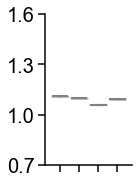

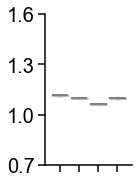

In [10]:
for split in splits:
    utilities.plot_framework_comparison(boot[split], obs, mean[split], metric=metric, w=1.2,
                                        n_iter=n_iter, suffix="k09_" + suffix + "_" + split, 
                                        ylim=[0.7,1.6], yticks=[0.7,1,1.3,1.6])